In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, glob, shutil
import mahotas as mh

In [3]:
DATAFOLDER = '/hpcstor6/scratch01/r/ryan.zurrin001/Ocular_disease/'

In [4]:
os.listdir(DATAFOLDER)

['masks', 'images.npy', 'images', 'masks.npy']

In [5]:
train_image_dir = os.path.join(DATAFOLDER, 'images')
#test_image_dir = os.path.join(DATAFOLDER, 'Test_In')
train_mask_dir =  os.path.join(DATAFOLDER, 'masks')
#test_mask_dir = os.path.join(DATAFOLDER, 'Test_Out')


In [6]:
all_image_files = sorted(sorted(glob.glob(train_image_dir+'/*.jpg')))
all_mask_files = sorted(sorted(glob.glob(train_mask_dir+'/*.jpg')))

In [7]:
# for i in os.listdir(train_mask_dir):
#     old_name = os.path.join(train_mask_dir, i)
#     print(old_name)
#     new_name = os.path.join(train_mask_dir, i.split('.')[0].zfill(4)+'.png')
#     print(new_name)
#     shutil.move(old_name, new_name)
# for i in os.listdir(test_mask_dir):
#     old_name = os.path.join(test_mask_dir, i)
#     print(old_name)
#     new_name = os.path.join(test_mask_dir, i.split('.')[0].zfill(4)+'.png')
#     print(new_name)
#     shutil.move(old_name, new_name)

In [8]:
print(len(all_image_files))

6392


In [9]:
print(len(all_mask_files))

6392


In [10]:
len(all_)

NameError: name 'all_' is not defined

In [11]:
import cv2

# create arrays to store grayscale images and masks
grayscale_images = np.zeros((len(all_image_files), 512, 512), dtype=np.uint8)
grayscale_masks = np.zeros((len(all_mask_files), 512, 512), dtype=np.uint8)

for i in range(len(all_image_files)):
    color_image = cv2.imread(all_image_files[i])
    color_mask = cv2.imread(all_mask_files[i])
    
    grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
    grayscale_mask = cv2.cvtColor(color_mask, cv2.COLOR_BGR2GRAY)
    
    all_image_files[i] = grayscale_image
    all_mask_files[i] = grayscale_mask


In [26]:
#all_image_files = sorted(sorted(glob.glob(train_image_dir+'/*.jpg')))
#all_mask_files = sorted(sorted(glob.glob(train_mask_dir+'/*.jpg')))

In [12]:
print(type(all_image_files[10]))

<class 'numpy.ndarray'>


In [13]:
print((all_image_files[500]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


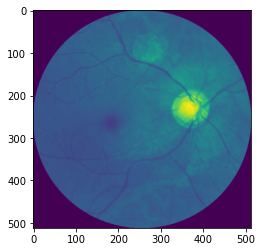

In [14]:
imshow(all_image_files[500])

In [15]:
len(all_mask_files)

6392

In [16]:
images = np.zeros((6392,512,512), dtype=np.uint8)

In [17]:
#from skimage.color import rgb2gray

#images = np.zeros((, 512, 512), dtype=np.uint8)
#counter = 0
#for a in all_image_files:
#    img = mh.imread(a)
    
    # grab left image
#    left = img[0:512,0:512]
#    right = img[0:512,512:]
    
    # convert to grayscale
#    left_gray = rgb2gray(left)
#    right_gray = rgb2gray(right)
    
#    images[counter] = (left_gray * 255).astype(np.uint8)
#    images[counter+1] = (right_gray * 255).astype(np.uint8)
    
#    counter += 2

In [19]:
counter = 0
print(type(all_image_files[1]))
for img in all_image_files:
    #img = mh.imread(a)
    
    # grab left image
    left = img[0:512,0:512]
    right = img[0:512,512:]
    
    
    images[counter] = left
    images[counter+1] = right
    
    counter += 2

<class 'numpy.ndarray'>


ValueError: could not broadcast input array from shape (512,0) into shape (512,512)

In [23]:
masks = np.zeros((660, 512, 512), dtype=np.bool)

In [24]:
counter = 0
for a in all_mask_files:
    img = mh.imread(a)
    print(a)
    
    if img.ndim == 3:
        # grab left image
        left = img[0:512,0:512,0]
        right = img[0:512,512:,0]
    elif img.ndim == 2:
        left = img[0:512,0:512]
        right = img[0:512,512:]
    
    masks[counter] = left.astype(np.bool)
    masks[counter+1] = right.astype(np.bool)
    
    counter += 2

/hpcstor6/scratch01/r/ryan.zurrin001/Ocular_disease/masks/0_left.jpg


ValueError: could not broadcast input array from shape (512,0) into shape (512,512)

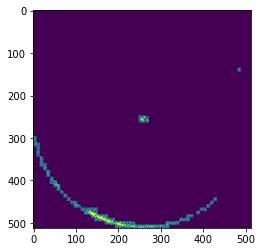

In [25]:
imshow(masks[0])

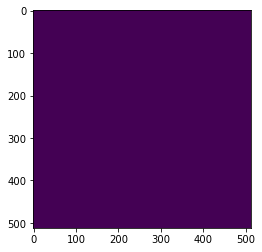

In [26]:
imshow(masks[-1])

In [27]:
images2 = np.expand_dims(images, axis=-1)

In [28]:
images2.shape

(660, 512, 512, 1)

In [29]:
masks2 = np.expand_dims(masks, axis=-1)

In [30]:
masks2.shape

(660, 512, 512, 1)

In [31]:
np.save('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_lucchi_images.npy', images2)

In [32]:
np.save('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_lucchi_masks.npy', masks2)